# **Análise de Dados - Prevenção de Inadimplência**
Este estudo tem como objetivo analisar as características sociais de clientes inadimplentes e adimplentes, e as métricas de desempenho dos funcionários do setor "Inteligência e Análise de Crédito". As informações foram organizadas para apoiar decisões estratégicas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando estilo dos gráficos
sns.set_theme(style="whitegrid")

# Carregando os arquivos CSV diretamente do local
caminho_funcionarios = '/content/funcionarios.csv'
caminho_adimplentes = '/content/adimplentes.csv'
caminho_inadimplentes = '/content/inadimplentes.csv'

df_funcionarios = pd.read_csv(caminho_funcionarios)
df_adimplentes = pd.read_csv(caminho_adimplentes)
df_inadimplentes = pd.read_csv(caminho_inadimplentes)

# Adicionando coluna de status para combinar adimplentes e inadimplentes
df_adimplentes['Status'] = 'Adimplente'
df_inadimplentes['Status'] = 'Inadimplente'
df_sociais = pd.concat([df_adimplentes, df_inadimplentes], ignore_index=True)

# Filtrando funcionários do setor de Inteligência e Análise de Crédito
df_funcionarios_credito = df_funcionarios[
    df_funcionarios["Departamento"] == "Inteligência e Análise de Crédito"
]



# **1. Funcionários do Departamento de Inteligência e Análise de Crédito**

## **Descrição:**
Analisamos as métricas de desempenho do setor estratégico "Inteligência e Análise de Crédito", incluindo salário mensal, avaliações de desempenho e treinamentos realizados. A análise busca identificar padrões que contribuam para a excelência operacional.


<ipython-input-2-b695cc864d9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_funcionarios_credito, x='Nome', y='Salario_Mensal', palette='Blues_d')


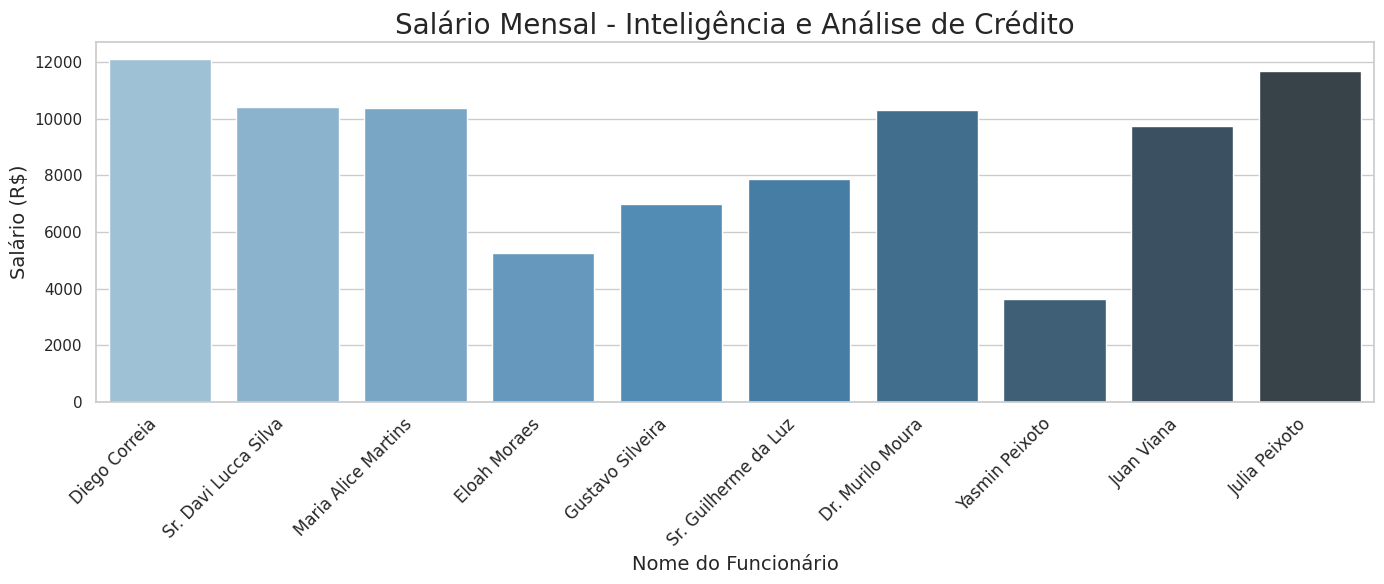

<ipython-input-2-b695cc864d9e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_funcionarios_credito, x='Nome', y='Treinamentos_Realizados', palette='Purples_d')


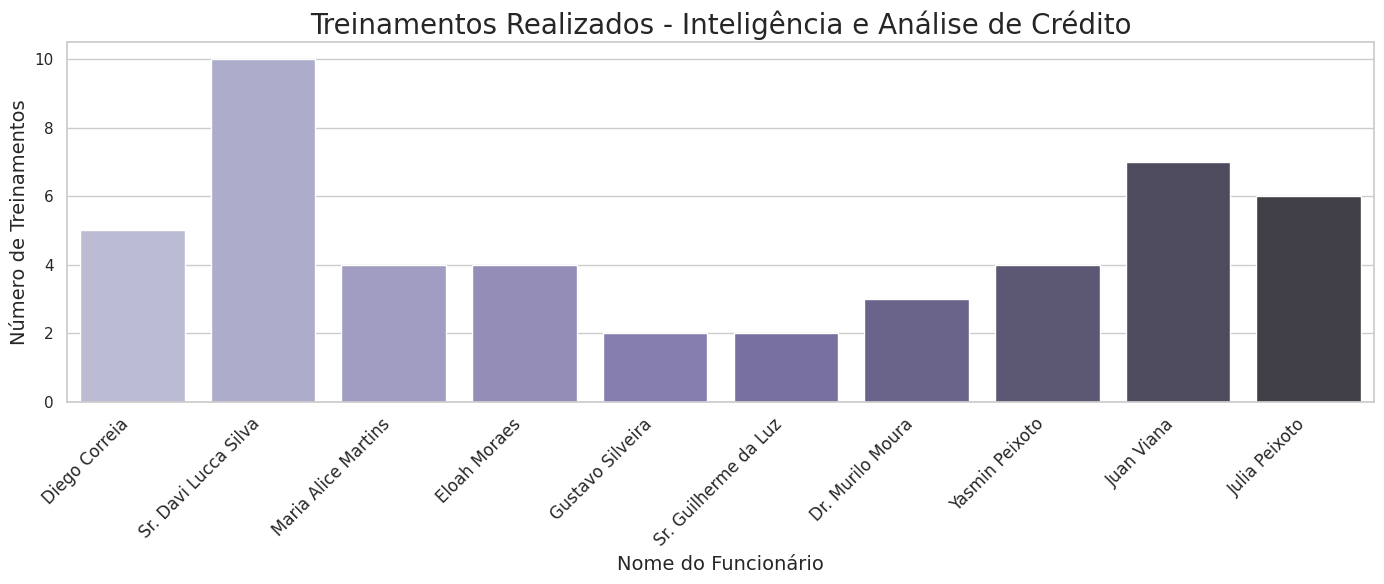

<ipython-input-2-b695cc864d9e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_funcionarios_credito, x='Nome', y='Nota', palette='Greens_d')


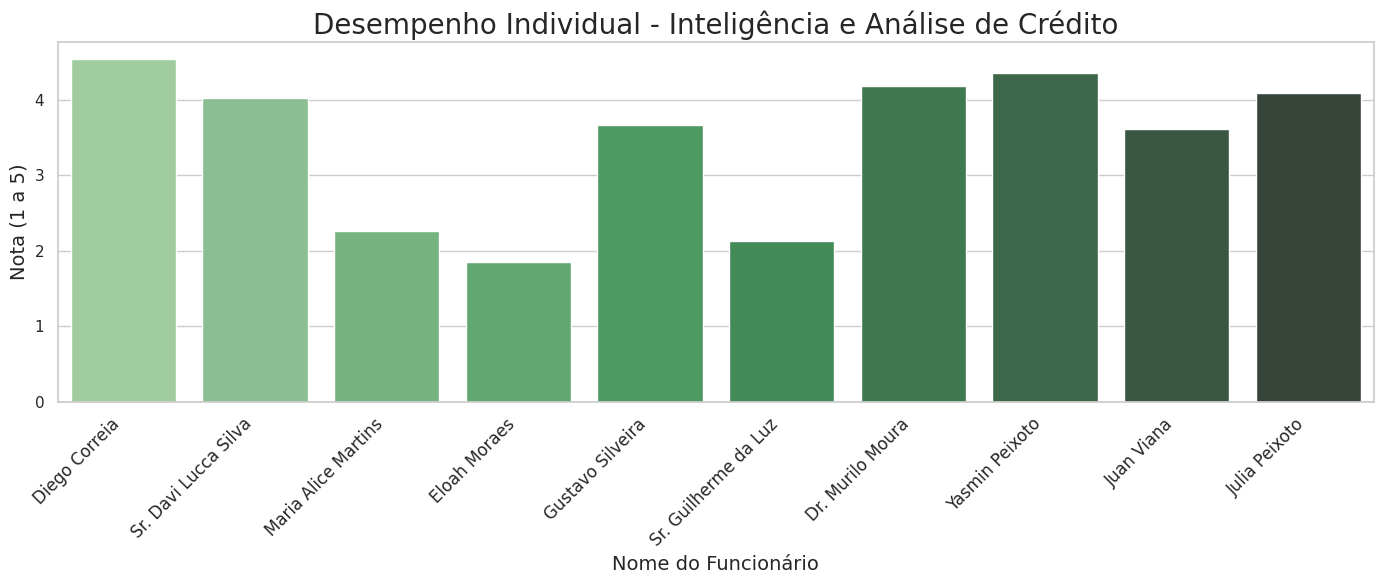

In [2]:
# Gráfico: Salário dos funcionários
plt.figure(figsize=(14, 6))
sns.barplot(data=df_funcionarios_credito, x='Nome', y='Salario_Mensal', palette='Blues_d')
plt.title("Salário Mensal - Inteligência e Análise de Crédito", fontsize=20)
plt.xlabel("Nome do Funcionário", fontsize=14)
plt.ylabel("Salário (R$)", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()
plt.show()

# Gráfico: Número de treinamentos realizados
plt.figure(figsize=(14, 6))
sns.barplot(data=df_funcionarios_credito, x='Nome', y='Treinamentos_Realizados', palette='Purples_d')
plt.title("Treinamentos Realizados - Inteligência e Análise de Crédito", fontsize=20)
plt.xlabel("Nome do Funcionário", fontsize=14)
plt.ylabel("Número de Treinamentos", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()
plt.show()

# Gráfico: Notas de desempenho individuais
plt.figure(figsize=(14, 6))
sns.barplot(data=df_funcionarios_credito, x='Nome', y='Nota', palette='Greens_d')
plt.title("Desempenho Individual - Inteligência e Análise de Crédito", fontsize=20)
plt.xlabel("Nome do Funcionário", fontsize=14)
plt.ylabel("Nota (1 a 5)", fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.tight_layout()
plt.show()


# **2. Distribuição de Scores de Crédito**



## **Análise e Impactos**
A análise da **distribuição dos scores de crédito** revela padrões comportamentais significativos entre clientes adimplentes e inadimplentes. Clientes com scores mais baixos tendem a pertencer ao grupo dos inadimplentes, indicando maior risco de inadimplência. Essa correlação evidencia que o score de crédito é um fator preditivo crítico, refletindo a capacidade do cliente de gerenciar suas obrigações financeiras.

O impacto disso na gestão de crédito é direto: a concessão de crédito sem uma avaliação criteriosa do score pode aumentar a exposição ao risco de inadimplência. Adicionalmente, clientes com scores intermediários, mas em situação de adimplência, podem se tornar o foco de programas de fidelização, visto que têm potencial de manter-se financeiramente equilibrados.

## **Prevenção Proposta**
- **Monitoramento Contínuo:** Instituições devem revisar regularmente os scores de crédito dos clientes para ajustar limites de crédito e juros.
- **Programas Educacionais:** Oferecer orientação financeira aos clientes com scores baixos pode ajudar a melhorar sua situação econômica e reduzir o risco.
- **Critérios Personalizados:** Aplicar regras de concessão de crédito mais rigorosas para clientes com scores abaixo de um limiar predefinido.


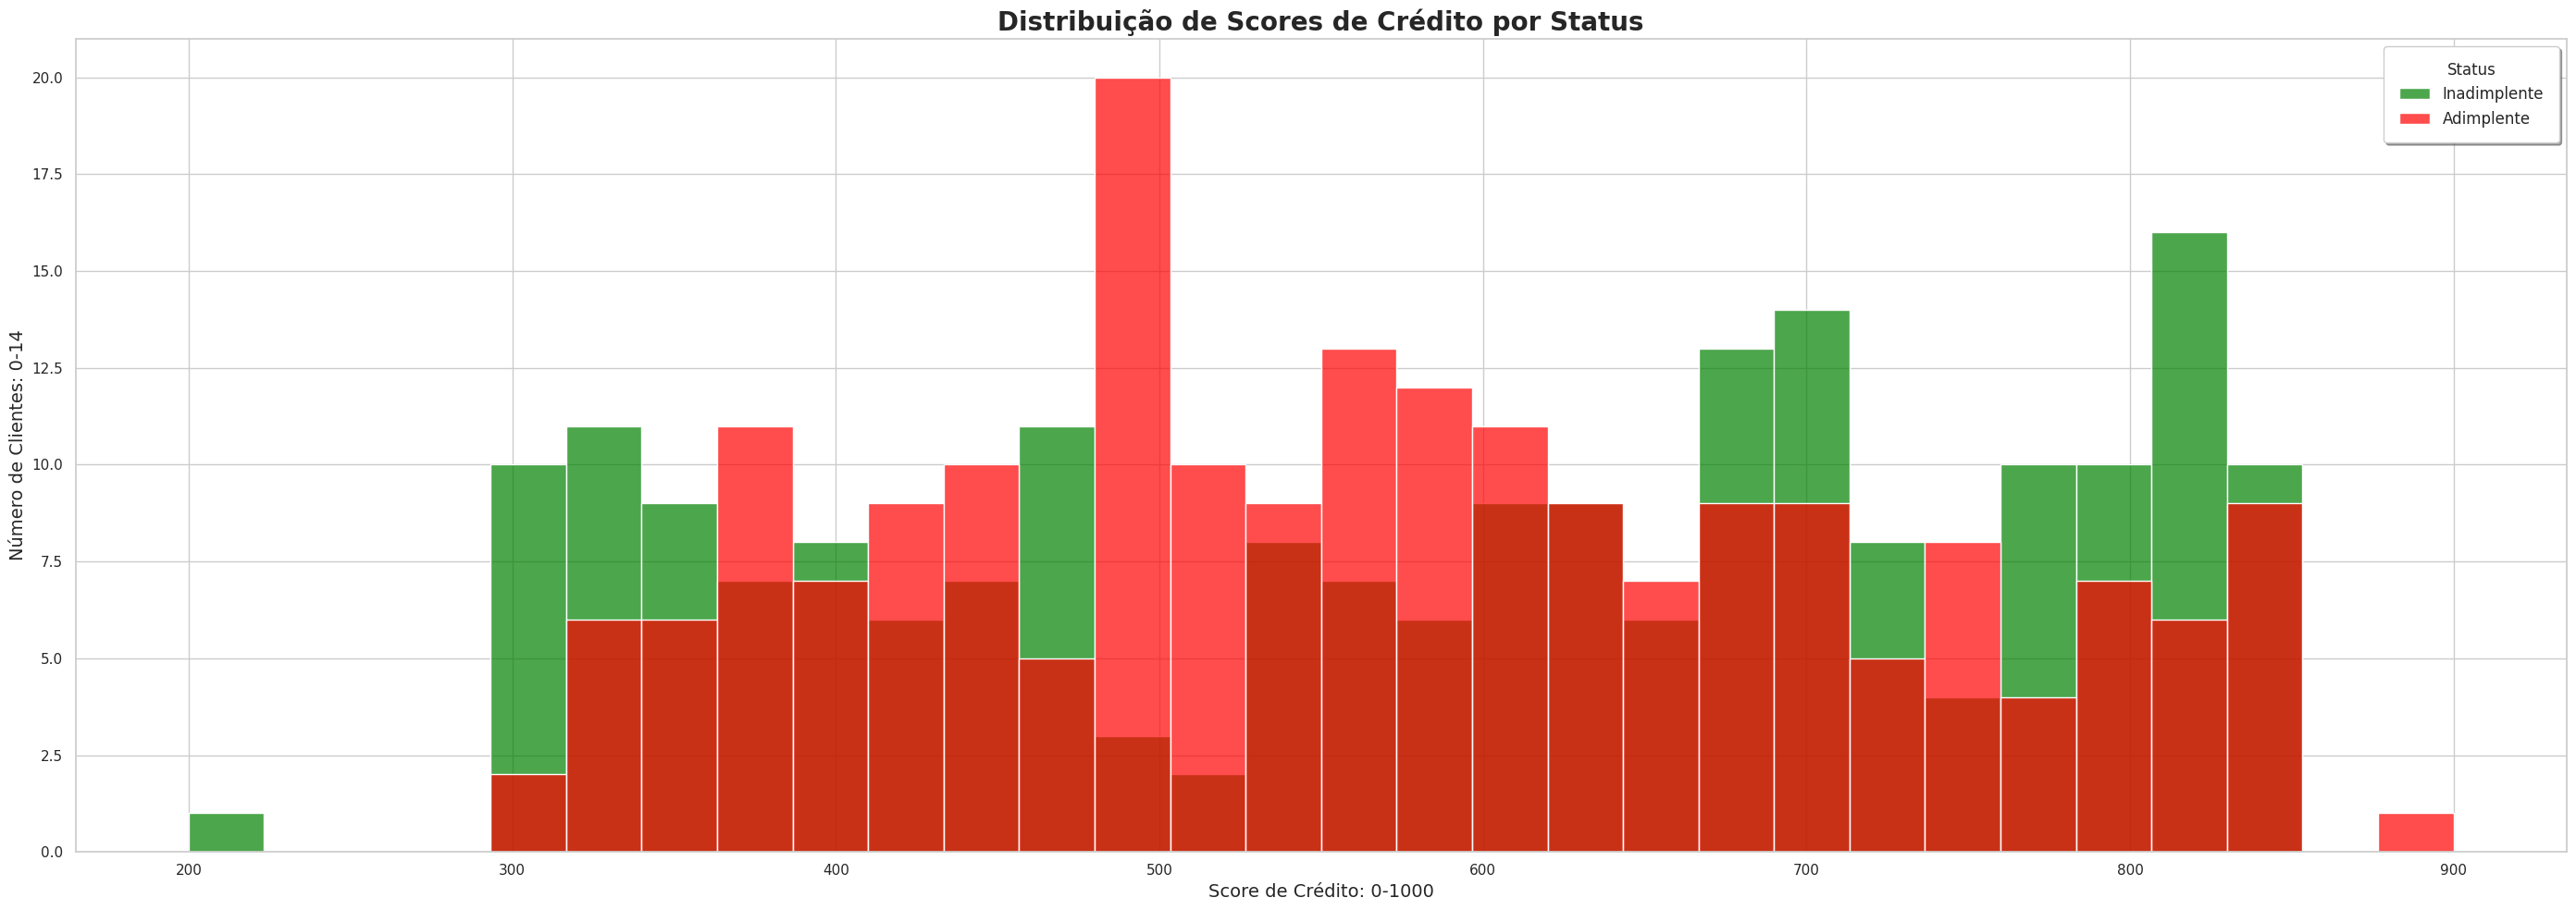

In [3]:
# Configurando o estilo do gráfico
sns.set_theme(style="whitegrid")

# Criando o gráfico
plt.figure(figsize=(28, 10))

# Histograma com densidade absoluta (número de clientes)
sns.histplot(
    data=df_sociais,
    x='Score',
    hue='Status',
    kde=False,  # Removendo a curva KDE para focar no número de clientes
    bins=30,
    palette=['red', 'green'],
    stat='count',  # Alterado para exibir número de clientes
    alpha=0.7
)

# Título e Eixos
plt.title("Distribuição de Scores de Crédito por Status", fontsize=20, fontweight="bold", loc="center")
plt.xlabel("Score de Crédito: 0-1000", fontsize=14)
plt.ylabel("Número de Clientes: 0-14", fontsize=14)

# Ajustando a legenda
plt.legend(
    title="Status",
    labels=["Inadimplente", "Adimplente"],
    fontsize=12,
    loc="upper right",
    frameon=True,
    shadow=True,
    fancybox=True,
    borderpad=1
)

# Adicionando um texto explicativo no gráfico
plt.annotate(
    "Inadimplentes possuem maior concentração de scores baixos.\n"
    "Adimplentes apresentam distribuição mais uniforme nos scores.",
    xy=(0.6, max(df_sociais['Score']) * 0.1),
    fontsize=11,
    bbox=dict(boxstyle="round", fc="lightyellow", alpha=0.6),
    color="black"
)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# **3. Compras nos Últimos Meses por Status**


## **Análise e Impactos**
A comparação dos valores gastos nos últimos meses evidencia uma relação interessante: clientes adimplentes apresentam maior mediana de compras, enquanto inadimplentes têm uma maior variabilidade. Isso sugere que os inadimplentes podem ter padrões de consumo menos previsíveis, potencialmente devido a decisões financeiras impulsivas ou instáveis.

Essa instabilidade reflete a necessidade de maior controle por parte das instituições financeiras, pois um comportamento errático pode ser um sinal precoce de dificuldades financeiras. Para o grupo adimplente, o padrão de compras mais estável pode ser aproveitado para prever sua capacidade de absorver novos produtos financeiros.

## **Prevenção Proposta**
- **Ofertas de Crédito Personalizadas:** Clientes com padrões de compras regulares podem receber ofertas com limites ajustados a seus hábitos de consumo.
- **Monitoramento de Consumo:** Analisar os picos de gastos dos clientes inadimplentes pode prever momentos de crise financeira.
- **Intervenção Antecipada:** Criar alertas para detectar gastos acima da média que indiquem risco de inadimplência.


                             ID_Cliente                   Nome  Idade  \
0  8f6de515-a94e-4c90-aafb-fedb39c56f41         Diego Monteiro     36   
1  df0fce50-7abd-4b62-8187-e0ebcc6779e6     Ana Beatriz Moraes     46   
2  c9b949ff-e418-4156-b7a5-883ba65fcc8a      Ana Clara Costela     47   
3  0d21837e-841f-4409-9d30-e2b8e499a62c  Dra. Natália da Rocha     40   
4  cdb2d1f4-d175-40ef-bf84-96e37fe4bc86      Maria Luiza Porto     49   

      Gênero Estado_Civil       Escolaridade  Renda_Familiar  \
0  Masculino     Solteiro  Superior Completo           16664   
1  Masculino        Viúvo     Médio Completo           12993   
2  Masculino       Casado   Médio Incompleto           11337   
3   Feminino   Divorciado   Médio Incompleto            6774   
4   Feminino   Divorciado      Pós-Graduação            3729   

   Despesas_Mensais  Filhos Situação_Trabalho      Status  Score  \
0           7361.96       3         Empregado  Adimplente    567   
1           9223.90       1      Desempr

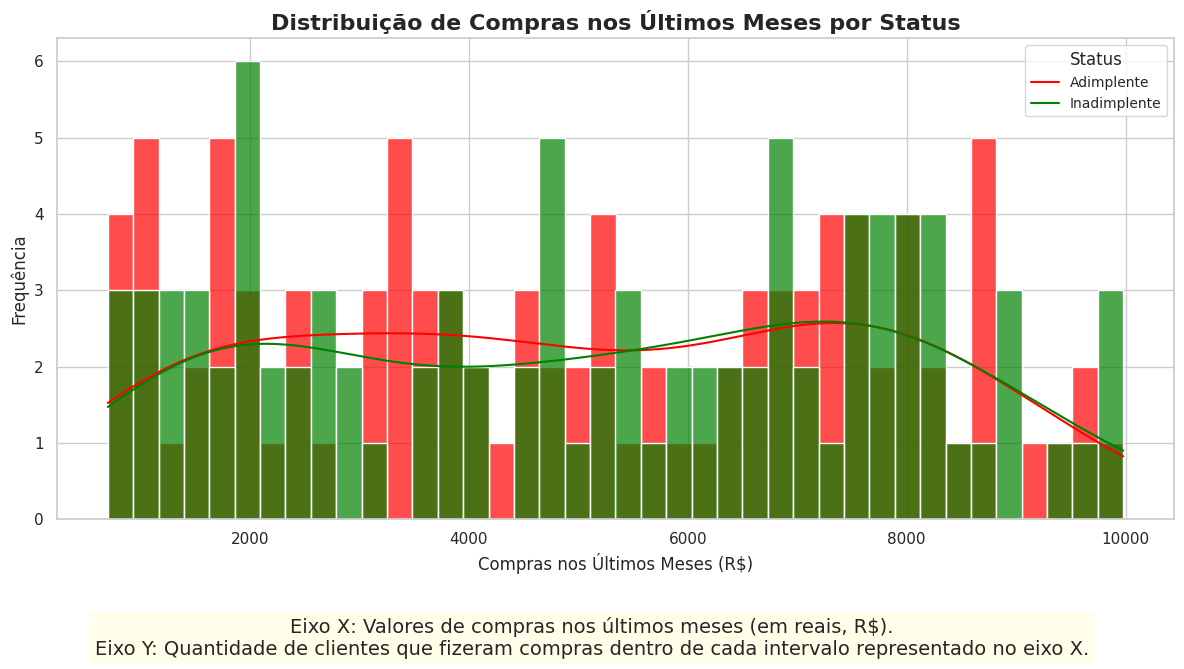

In [4]:
# Substitua 'adimplentes.csv' e 'inadimplentes.csv' pelos nomes reais dos arquivos.
adimplentes_df = pd.read_csv("adimplentes.csv")
inadimplentes_df = pd.read_csv("inadimplentes.csv")

# Adicionando a coluna 'Status'
adimplentes_df['Status'] = 'Adimplente'
inadimplentes_df['Status'] = 'Inadimplente'

# Concatenando os DataFrames
clientes_df = pd.concat([adimplentes_df, inadimplentes_df], ignore_index=True)

# Visualizando as primeiras linhas para verificar
print(clientes_df.head())

# Removendo valores extremos para melhor visualização
clientes_df = clientes_df[(clientes_df['Compras_Ultimos_Meses'] >= 700) &
                          (clientes_df['Compras_Ultimos_Meses'] <= 10000)]

# Visualizando as primeiras linhas para verificar
print("Estrutura do DataFrame combinado:")
print(clientes_df.head())

# Removendo valores extremos para melhor visualização
clientes_df = clientes_df[(clientes_df['Compras_Ultimos_Meses'] >= 700) &
                          (clientes_df['Compras_Ultimos_Meses'] <= 10000)]

# Configurando o estilo do gráfico
sns.set_theme(style="whitegrid")

# Criando o gráfico com bins ajustados para melhorar a frequência
plt.figure(figsize=(12, 6))
sns.histplot(
    data=clientes_df,
    x="Compras_Ultimos_Meses",
    hue="Status",
    kde=True,
    bins=40,  # Aumentando o número de bins
    palette=["green", "red"],
    alpha=0.7
)

# Título e Eixos
plt.title("Distribuição de Compras nos Últimos Meses por Status", fontsize=16, fontweight="bold")
plt.xlabel("Compras nos Últimos Meses (R$)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

# Ajustando a legenda explicativa abaixo do gráfico
plt.figtext(
    0.5, -0.1,
    "Eixo X: Valores de compras nos últimos meses (em reais, R$).\n"
    "Eixo Y: Quantidade de clientes que fizeram compras dentro de cada intervalo representado no eixo X.",
    wrap=True, horizontalalignment='center', fontsize=14, bbox=dict(boxstyle="round", fc="lightyellow", alpha=0.7)
)

# Ajustando a legenda dos status
plt.legend(title="Status", labels=["Adimplente", "Inadimplente"], fontsize=10, loc="upper right", frameon=True)

# Ajustando layout
plt.tight_layout()
plt.show()

# **4. Tempo de Nome no Serasa por Status**


## **Análise e Impactos**
A diferença entre condições sociais e financeiras é mais acentuada entre inadimplentes. Esses clientes frequentemente enfrentam disparidades como alta renda declarada, mas baixa capacidade de gerenciar despesas, ou situações inversas, como alto custo de vida sem renda proporcional. Esse dado destaca que a análise isolada de fatores financeiros não é suficiente para entender o comportamento do cliente.

A disparidade social-financeira entre grupos indica que inadimplentes podem enfrentar dificuldades estruturais, como falta de educação financeira, condições de trabalho precárias ou despesas fixas excessivas. Essas condições amplificam o risco de inadimplência, especialmente em situações de crise econômica.

## **Prevenção Proposta**
- **Apoio Personalizado:** Desenvolver programas de aconselhamento financeiro personalizados para clientes com grandes disparidades.
- **Educação Financeira:** Oferecer workshops sobre planejamento financeiro e gestão de despesas.
- **Produtos Customizados:** Criar produtos que considerem tanto o perfil social quanto financeiro do cliente, como planos de crédito com amortizações flexíveis.

<ipython-input-5-ab419b3013ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_sociais, x="Status", y="Tempo_Nome_Serasa", palette=['green', 'red'], scale="count", inner="quartile")
<ipython-input-5-ab419b3013ab>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df_sociais, x="Status", y="Tempo_Nome_Serasa", palette=['green', 'red'], scale="count", inner="quartile")


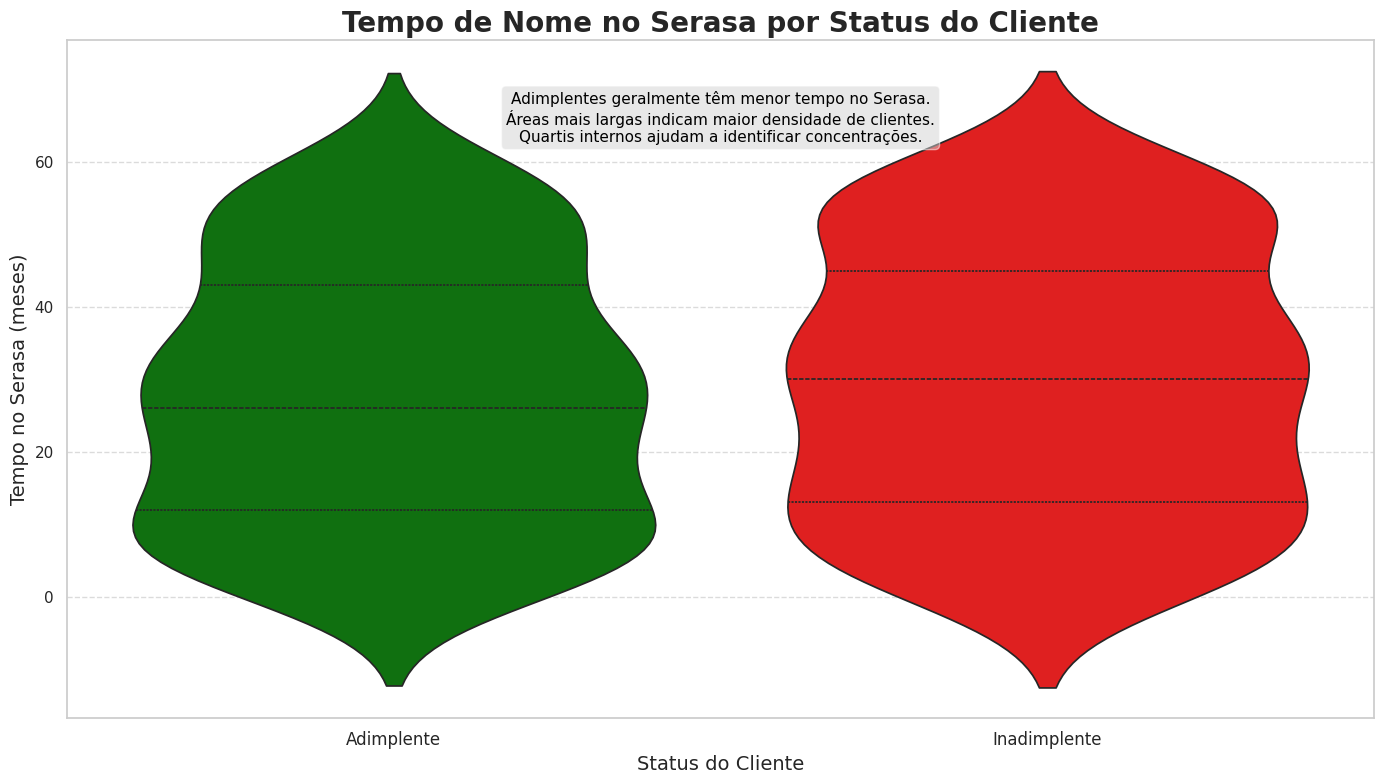

In [5]:
plt.figure(figsize=(14, 8))

# Violinplot
sns.violinplot(data=df_sociais, x="Status", y="Tempo_Nome_Serasa", palette=['green', 'red'], scale="count", inner="quartile")

# Título e eixos
plt.title("Tempo de Nome no Serasa por Status do Cliente", fontsize=20, fontweight="bold")
plt.xlabel("Status do Cliente", fontsize=14)
plt.ylabel("Tempo no Serasa (meses)", fontsize=14)

# Ajustando os rótulos
plt.xticks(ticks=[0, 1], labels=["Adimplente", "Inadimplente"], fontsize=12)

# Grid para ajudar na leitura
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Observação no gráfico
plt.annotate(
    "Adimplentes geralmente têm menor tempo no Serasa.\n"
    "Áreas mais largas indicam maior densidade de clientes.\n"
    "Quartis internos ajudam a identificar concentrações.",
    xy=(0.5, 0.85), xycoords='axes fraction', fontsize=11, ha='center', color='black',
    bbox=dict(boxstyle="round", fc="lightgrey", alpha=0.5))

plt.tight_layout()
plt.show()


# **5. Diferença Social-Financeira por Status**




## **Análise e Impactos**
A diferença entre condições sociais e financeiras é mais acentuada entre inadimplentes. Esses clientes frequentemente enfrentam disparidades como alta renda declarada, mas baixa capacidade de gerenciar despesas, ou situações inversas, como alto custo de vida sem renda proporcional. Esse dado destaca que a análise isolada de fatores financeiros não é suficiente para entender o comportamento do cliente.

A disparidade social-financeira entre grupos indica que inadimplentes podem enfrentar dificuldades estruturais, como falta de educação financeira, condições de trabalho precárias ou despesas fixas excessivas. Essas condições amplificam o risco de inadimplência, especialmente em situações de crise econômica.

## **Prevenção Proposta**
- **Apoio Personalizado:** Desenvolver programas de aconselhamento financeiro personalizados para clientes com grandes disparidades.
- **Educação Financeira:** Oferecer workshops sobre planejamento financeiro e gestão de despesas.
- **Produtos Customizados:** Criar produtos que considerem tanto o perfil social quanto financeiro do cliente, como planos de crédito com amortizações flexíveis.

# **5.1 Diferença Social-Financeira: Definição e Impacto**



## **1. O que é a Diferença Social-Financeira?**

A **diferença social-financeira** é uma métrica combinada que avalia o descompasso entre as condições sociais e financeiras de um cliente. Essa métrica permite identificar o impacto de fatores sociais, como padrão de vida, e sua relação com a capacidade financeira, como renda e controle de despesas.

### **Componentes da Diferença Social-Financeira**

#### **A. Perfil Social (Condições Sociais):**
Fatores relacionados ao contexto social do cliente:
- **Nível de Escolaridade:** Impacta o potencial de emprego e estabilidade financeira.
- **Acesso a Serviços Públicos:** Saúde, transporte e educação são custos indiretos.
- **Local de Residência:** Regiões com custos de vida elevados afetam as despesas.
- **Tamanho da Família:** Aumento no número de dependentes gera maior pressão econômica.
- **Estilo de Vida:** Preferências de consumo e padrão de vida adotado.

#### **B. Perfil Financeiro (Condições Financeiras):**
Fatores relacionados à saúde econômica do cliente:
- **Renda Mensal:** Representa a capacidade de geração de recursos.
- **Gastos Fixos:** Despesas essenciais como aluguel, alimentação e transporte.
- **Dívidas Ativas:** Financiamentos, cartões de crédito e empréstimos pendentes.
- **Capacidade de Poupança:** Indica a capacidade de planejar e economizar.
- **Histórico de Pagamentos:** Consistência em manter as contas em dia.

---

## **2. Como a Diferença Social-Financeira é Calculada?**

A diferença é derivada comparando o **custo social estimado** com a **capacidade financeira do cliente**.

**Fórmula:**
\[
\text{Diferença Social-Financeira} = (\text{Custos Sociais Estimados}) - (\text{Renda e Capacidade de Pagamento})
\]

### **Exemplo Prático:**
- Um cliente gasta R$ 8.000 por mês em despesas sociais (moradia, transporte, dependentes).
- Sua renda mensal líquida é de R$ 5.000.
- Resultado: Diferença social-financeira de **R$ 3.000 negativos**, indicando um descompasso financeiro.

---

## **3. Por que é Importante?**

A **diferença social-financeira** é um indicador preditivo de:
- **Dificuldades Estruturais:** Clientes com altos custos sociais (educação, saúde, dependentes) acima de sua capacidade financeira têm maior chance de inadimplência.
- **Risco de Inadimplência:** Grandes diferenças sugerem dificuldades em manter pagamentos regulares.
- **Comportamento Financeiro:** Despesas sociais desproporcionais refletem baixa disciplina financeira.

---

## **4. Dados para Estimar a Diferença Social-Financeira**

### **Perfil Social (Condições Sociais):**
- **Educação:** Fundamental, médio, superior, etc.
- **Localização:** Custo médio de vida na região do cliente.
- **Dependentes:** Número de pessoas que dependem do cliente.

### **Perfil Financeiro (Condições Financeiras):**
- **Salário Líquido:** Renda mensal após deduções.
- **Despesas Fixas:** Custos mensais como moradia, alimentação e transporte.
- **Dívidas Pendentes:** Valores de financiamentos e cartões de crédito.
- **Patrimônio Líquido:** Bens e investimentos do cliente.

---

## **5. Insights Gerados pela Diferença Social-Financeira**

### **A. Clientes Adimplentes**
- **Diferença menor ou inexistente:** Alinham seu padrão de vida à sua capacidade financeira.
- **Estabilidade:** Apresentam maior controle financeiro.

### **B. Clientes Inadimplentes**
- **Grande diferença:** Custos sociais muito elevados em relação à renda.
- **Variabilidade:** Alta dispersão, indicando descontrole financeiro ou despesas imprevisíveis.

---

## **6. Aplicações Práticas**

### **A. Identificação de Riscos**
Clientes com grande diferença social-financeira apresentam maior risco de inadimplência, sendo necessário monitoramento e ajustes nos critérios de concessão de crédito.

### **B. Desenvolvimento de Programas**
- **Educação Financeira:** Oferecer programas para ensinar planejamento financeiro.
- **Suporte Personalizado:** Criar estratégias adaptadas para reduzir a disparidade.

### **C. Prevenção de Inadimplência**
Ajustar limites de crédito, renegociar prazos e monitorar despesas excessivas podem ajudar a prevenir situações de inadimplência.

---

## **7. Conclusão**

A **diferença social-financeira** é um indicador essencial para avaliar o equilíbrio entre as condições sociais e financeiras de um cliente. Ela não apenas ajuda a prever riscos de inadimplência, mas também oferece insights valiosos para personalizar soluções financeiras, melhorar o suporte ao cliente e reduzir a exposição ao risco por parte das instituições financeiras.


## **3. Distribuições Financeiras e Demográficas**

Top 5 Tipos de Negócios Mais Frequentes:
Tipo_Negocio
Comércio     73
Autônomo     71
Indústria    68
Serviços     57
Educação     33
dtype: int64


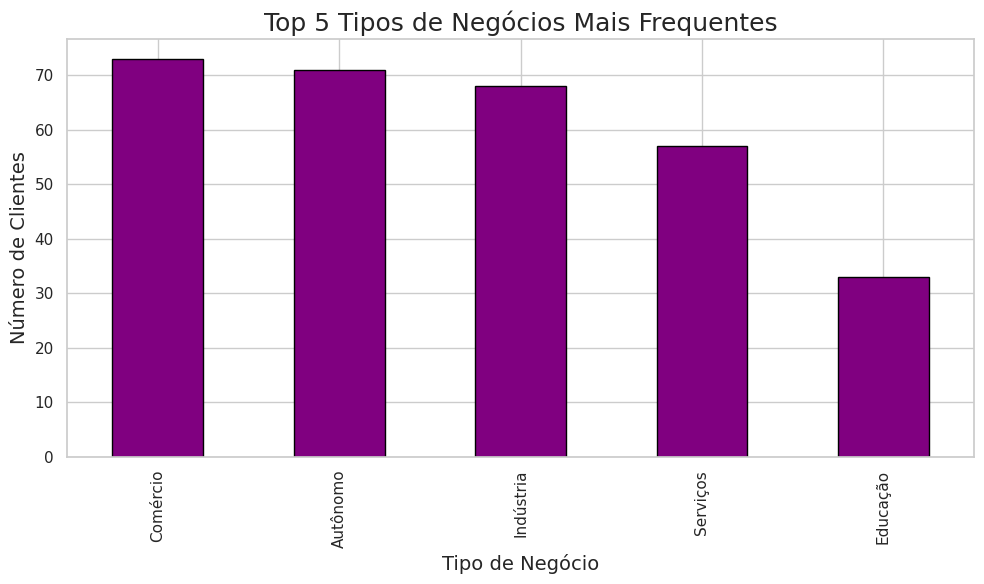

Top 5 Tipos de Negócios com Maior Número de Adimplentes:
Tipo_Negocio
Indústria    33
Autônomo     29
Educação     29
Serviços     27
Comércio     24
dtype: int64


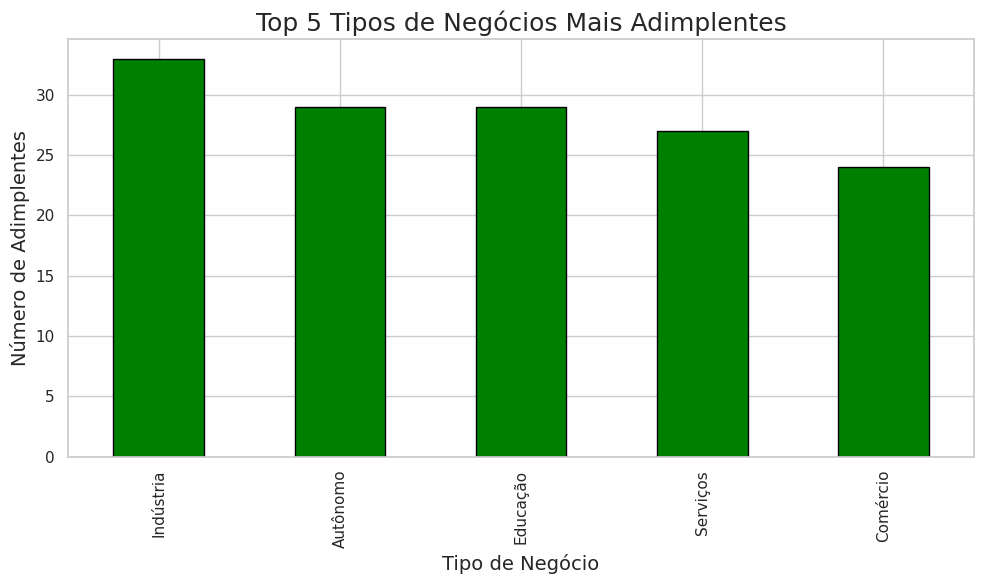

Top 5 Tipos de Negócios com Maior Número de Inadimplentes:
Tipo_Negocio
Comércio     49
Autônomo     42
Indústria    35
Serviços     30
Logística    25
dtype: int64


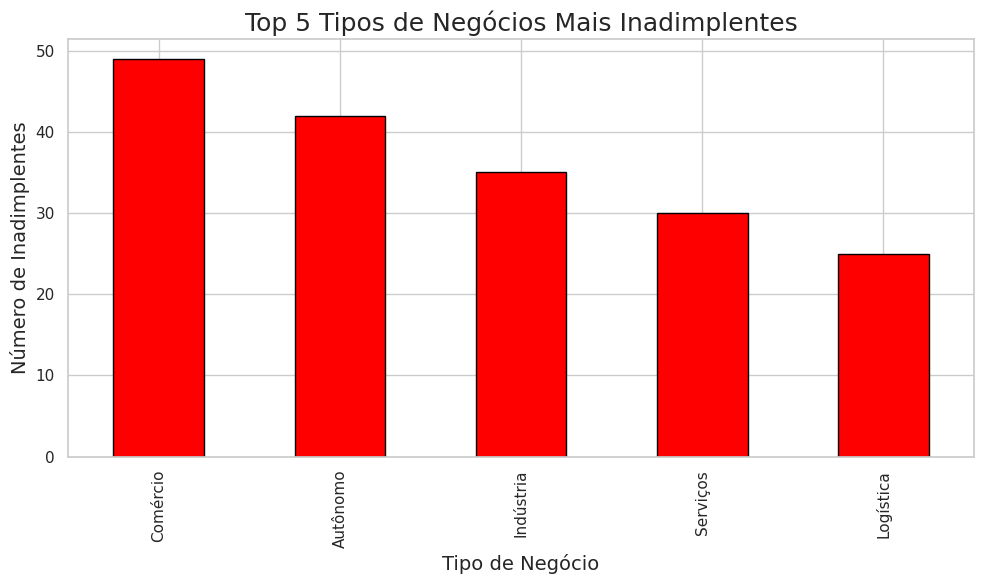

Top 5 Clientes Adimplentes por Valor Emprestado:
                       Nome  Valor_Emprestimo           Nome_Empresa
36   Lucas Gabriel da Costa             49978     Unidade Indústrias
117             Levi Castro             49795       Prime Indústrias
21          Mariane Cardoso             49489      Prime Tecnologias
55          Daniela Cardoso             49014  Confiança Consultoria
75              Erick Nunes             48711                Bastech


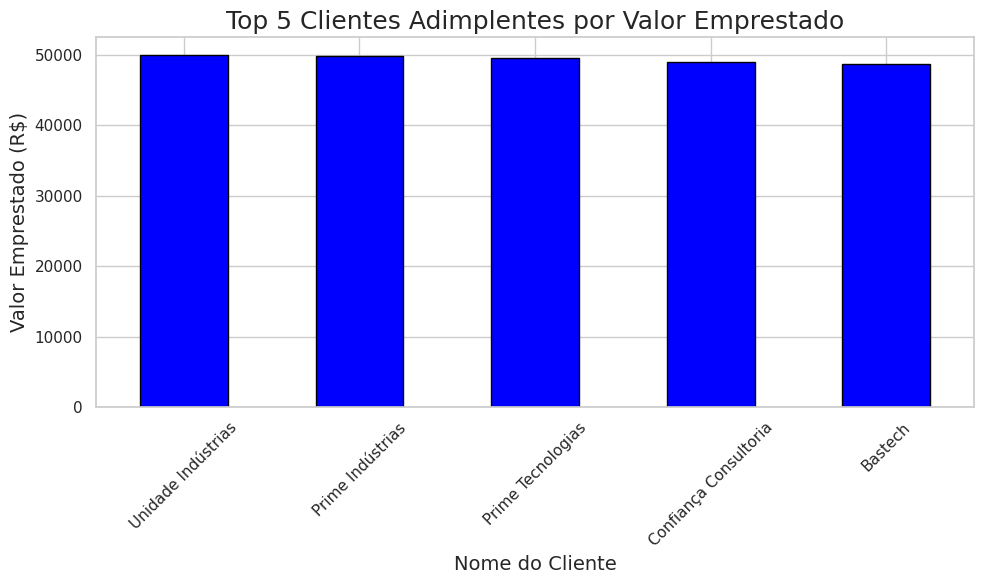

Top 5 Clientes Inadimplentes por Valor Emprestado:
                               Nome  Valor_Emprestimo             Nome_Empresa
238                    Joana Moraes             49884  Vértice Empreendimentos
232                     Isis Fogaça             49786                   Fastin
364  Sr. Marcos Vinicius Nascimento             49508     Alvorada Corporativo
312                      Júlia Melo             49259               Luci doces
306                       Igor Dias             48959           Verde Holdings


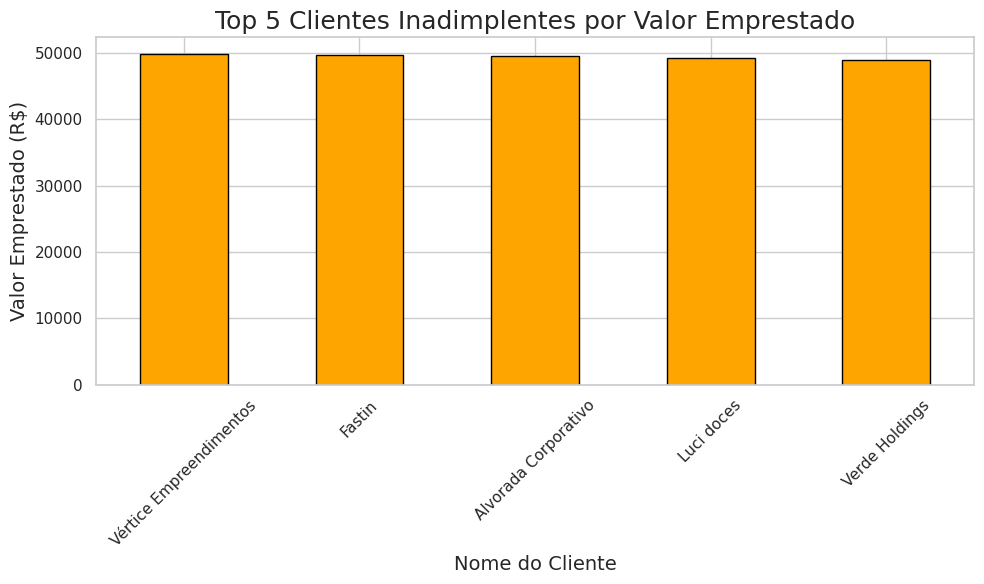

In [6]:
adimplentes_df = df_adimplentes
inadimplentes_df = df_inadimplentes
# Adicionando a coluna 'Status'
adimplentes_df['Status'] = 'Adimplente'
inadimplentes_df['Status'] = 'Inadimplente'

# Concatenando os DataFrames
clientes_df = pd.concat([adimplentes_df, inadimplentes_df], ignore_index=True)

# **1. Top 5 Tipos de Negócios Mais Frequentes**
top_5_tipos_gerais = (
    clientes_df.groupby("Tipo_Negocio")
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Tipos de Negócios Mais Frequentes:")
print(top_5_tipos_gerais)

# Gráfico para os tipos de negócios mais frequentes
plt.figure(figsize=(10, 6))
top_5_tipos_gerais.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top 5 Tipos de Negócios Mais Frequentes", fontsize=18)
plt.xlabel("Tipo de Negócio", fontsize=14)
plt.ylabel("Número de Clientes", fontsize=14)
plt.tight_layout()
plt.show()

# **2. Top 5 Tipos de Negócios com Maior Número de Adimplentes**
top_5_adimplentes = (
    clientes_df[clientes_df["Status"] == "Adimplente"]
    .groupby("Tipo_Negocio")
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Tipos de Negócios com Maior Número de Adimplentes:")
print(top_5_adimplentes)

# Gráfico para os tipos de negócios mais adimplentes
plt.figure(figsize=(10, 6))
top_5_adimplentes.plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 5 Tipos de Negócios Mais Adimplentes", fontsize=18)
plt.xlabel("Tipo de Negócio", fontsize=14)
plt.ylabel("Número de Adimplentes", fontsize=14)
plt.tight_layout()
plt.show()

# **3. Top 5 Tipos de Negócios com Maior Número de Inadimplentes**
top_5_inadimplentes = (
    clientes_df[clientes_df["Status"] == "Inadimplente"]
    .groupby("Tipo_Negocio")
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 Tipos de Negócios com Maior Número de Inadimplentes:")
print(top_5_inadimplentes)

# Gráfico para os tipos de negócios mais inadimplentes
plt.figure(figsize=(10, 6))
top_5_inadimplentes.plot(kind="bar", color="red", edgecolor="black")
plt.title("Top 5 Tipos de Negócios Mais Inadimplentes", fontsize=18)
plt.xlabel("Tipo de Negócio", fontsize=14)
plt.ylabel("Número de Inadimplentes", fontsize=14)
plt.tight_layout()
plt.show()

# **4. Top 5 Clientes Adimplentes por Valor Emprestado**
top_5_clientes_adimplentes = (
    clientes_df[clientes_df["Status"] == "Adimplente"]
    .sort_values(by="Valor_Emprestimo", ascending=False)
    .head(5)[["Nome", "Valor_Emprestimo", "Nome_Empresa"]]
)
print("Top 5 Clientes Adimplentes por Valor Emprestado:")
print(top_5_clientes_adimplentes)

# Gráfico para os clientes mais adimplentes
plt.figure(figsize=(10, 6))
top_5_clientes_adimplentes.set_index("Nome_Empresa")["Valor_Emprestimo"].plot(kind="bar", color="blue", edgecolor="black")
plt.title("Top 5 Clientes Adimplentes por Valor Emprestado", fontsize=18)
plt.xlabel("Nome do Cliente", fontsize=14)
plt.ylabel("Valor Emprestado (R$)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Top 5 Clientes Inadimplentes por Valor Emprestado**
top_5_clientes_inadimplentes = (
    clientes_df[clientes_df["Status"] == "Inadimplente"]
    .sort_values(by="Valor_Emprestimo", ascending=False)
    .head(5)[["Nome", "Valor_Emprestimo", "Nome_Empresa"]]
)
print("Top 5 Clientes Inadimplentes por Valor Emprestado:")
print(top_5_clientes_inadimplentes)

# Gráfico para os clientes mais inadimplentes
plt.figure(figsize=(10, 6))
top_5_clientes_inadimplentes.set_index("Nome_Empresa")["Valor_Emprestimo"].plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 5 Clientes Inadimplentes por Valor Emprestado", fontsize=18)
plt.xlabel("Nome do Cliente", fontsize=14)
plt.ylabel("Valor Emprestado (R$)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **6. Conclusões do Estudo**




## **Como o Estudo Funciona**

Este estudo combina dados financeiros e sociais para identificar padrões entre grupos de clientes. Cada gráfico apresenta uma dimensão específica da análise, como comportamento de consumo, risco financeiro e impacto social. Esses dados são integrados para oferecer insights que ajudam na prevenção de inadimplência e na criação de estratégias financeiras mais eficazes.

## **Conclusão Geral**
O uso combinado de métricas como score de crédito, comportamento de consumo, tempo no Serasa e diferenças sociais-financeiras permite compreender o cliente de forma holística. Essas análises não apenas ajudam a prever inadimplência, mas também orientam a criação de estratégias preventivas e corretivas, alinhando as necessidades dos clientes às metas das instituições financeiras.


In [7]:
# Loading the data (assuming the CSV files are available)
adimplentes_df = pd.read_csv('adimplentes.csv')
inadimplentes_df = pd.read_csv('inadimplentes.csv')

# Combining the two dataframes for overall analysis
df_sociais = pd.concat([adimplentes_df, inadimplentes_df])

# Extracting main insights
total_clientes = df_sociais.shape[0]
total_inadimplentes = df_sociais[df_sociais['Status'] == 'Inadimplente'].shape[0]
total_adimplentes = df_sociais[df_sociais['Status'] == 'Adimplente'].shape[0]

escolaridade_inadimplentes = inadimplentes_df['Escolaridade'].mode()[0]
escolaridade_adimplentes = adimplentes_df['Escolaridade'].mode()[0]

renda_inadimplentes = round(inadimplentes_df['Renda_Familiar'].mean(), 2)
renda_adimplentes = round(adimplentes_df['Renda_Familiar'].mean(), 2)

inadimplentes_percentual = round((total_inadimplentes / total_clientes) * 100, 2)
adimplentes_percentual = round((total_adimplentes / total_clientes) * 100, 2)

# Displaying the conclusions with improvements
print("="*60)
print("                   Conclusões do Estudo                   ")
print("="*60)
print(f"Total de clientes analisados: {total_clientes}")
print(f"  - Número de inadimplentes: {total_inadimplentes} ({inadimplentes_percentual}%)")
print(f"  - Número de adimplentes: {total_adimplentes} ({adimplentes_percentual}%)")

print("\nCaracterísticas mais comuns dos clientes:")
print(f"  - Escolaridade mais comum entre inadimplentes: {escolaridade_inadimplentes}")
print(f"  - Escolaridade mais comum entre adimplentes: {escolaridade_adimplentes}")

print("\nAnálise financeira:")
print(f"  - Renda familiar média dos inadimplentes: R$ {renda_inadimplentes}")
print(f"  - Renda familiar média dos adimplentes: R$ {renda_adimplentes}")

print("\nObservações:")
print("  - A proporção de inadimplentes é significativa, indicando a necessidade de")
print("    estratégias de mitigação de risco mais eficazes.")
print("  - A escolaridade parece ser um fator importante na adimplência, o que sugere")
print("    a possibilidade de iniciativas educativas como uma intervenção potencial.")
print("  - A renda média dos inadimplentes é consideravelmente menor, indicando que")
print("    fatores econômicos desempenham um papel crucial no risco de inadimplência.")
print("="*60)


                   Conclusões do Estudo                   
Total de clientes analisados: 410
  - Número de inadimplentes: 205 (50.0%)
  - Número de adimplentes: 205 (50.0%)

Características mais comuns dos clientes:
  - Escolaridade mais comum entre inadimplentes: Superior Completo
  - Escolaridade mais comum entre adimplentes: Fundamental Completo

Análise financeira:
  - Renda familiar média dos inadimplentes: R$ 11132.99
  - Renda familiar média dos adimplentes: R$ 10127.64

Observações:
  - A proporção de inadimplentes é significativa, indicando a necessidade de
    estratégias de mitigação de risco mais eficazes.
  - A escolaridade parece ser um fator importante na adimplência, o que sugere
    a possibilidade de iniciativas educativas como uma intervenção potencial.
  - A renda média dos inadimplentes é consideravelmente menor, indicando que
    fatores econômicos desempenham um papel crucial no risco de inadimplência.
